### PPO AGENT:

#### Load the dataset and preprocess the dataframe in the required format.

Technical indicators created for the environment include:

- RSI
- MACD
- Stoch_k
- OBV
- Upper_BB
- ATR_1
- ATR_2
- ATR_5
- ATR_10
- ATR_20

In [1]:
import pandas as pd
import numpy as np
import talib as ta

class TechnicalIndicators:
    def __init__(self, data):
        self.data = data

    def add_momentum_indicators(self):
        self.data['RSI'] = ta.RSI(self.data['Close'], timeperiod=14)
        self.data['MACD'], self.data['MACD_signal'], self.data['MACD_hist'] = ta.MACD(self.data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
        self.data['Stoch_k'], self.data['Stoch_d'] = ta.STOCH(self.data['High'], self.data['Low'], self.data['Close'],
                                                              fastk_period=14, slowk_period=3, slowd_period=3)

    def add_volume_indicators(self):
        self.data['OBV'] = ta.OBV(self.data['Close'], self.data['Volume'])

    def add_volatility_indicators(self):
        self.data['Upper_BB'], self.data['Middle_BB'], self.data['Lower_BB'] = ta.BBANDS(self.data['Close'], timeperiod=20)
        self.data['ATR_1'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=1)
        self.data['ATR_2'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=2)
        self.data['ATR_5'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)
        self.data['ATR_10'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=10)
        self.data['ATR_20'] = ta.ATR(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=20)

    def add_trend_indicators(self):
        self.data['ADX'] = ta.ADX(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['+DI'] = ta.PLUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['-DI'] = ta.MINUS_DI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=14)
        self.data['CCI'] = ta.CCI(self.data['High'], self.data['Low'], self.data['Close'], timeperiod=5)

    def add_other_indicators(self):
        self.data['DLR'] = np.log(self.data['Close'] / self.data['Close'].shift(1))
        self.data['TWAP'] = self.data['Close'].expanding().mean()
        self.data['VWAP'] = (self.data['Volume'] * (self.data['High'] + self.data['Low']) / 2).cumsum() / self.data['Volume'].cumsum()

    def add_all_indicators(self):
        self.add_momentum_indicators()
        self.add_volume_indicators()
        self.add_volatility_indicators()
        self.add_trend_indicators()
        self.add_other_indicators()
        return self.data

1. Load and Preprocess the Data: The script loads the CSV data, scales the prices, and computes necessary columns like Close, Volume, High, Low, Open, Bid_Ask_Spread, and Volatility.

2. Compute Technical Indicators with the TechnicalIndicators class.

3. Use the Impulse Control Function to include the bid-ask spread and volatility in its calculations.

4. Visualization the original and controlled stock prices as well as inventory levels over time.

In [2]:
data = pd.read_csv(r'C:\Users\henrikhavas\anaconda3\envs\coding\projects\xnas-itch-20230703.tbbo.csv')

# Preprocessing to create necessary columns
data['price']=data['price']/1e9
data['bid_px_00']=data['bid_px_00']/1e9
data['ask_px_00']=data['ask_px_00']/1e9

data['Close'] = data['price']
data['Volume'] = data['size']
data['High'] = data[['bid_px_00', 'ask_px_00']].max(axis=1)
data['Low'] = data[['bid_px_00', 'ask_px_00']].min(axis=1)
data['Open'] = data['Close'].shift(1).fillna(data['Close'])

# Compute bid-ask spread and volatility
data['Bid_Ask_Spread'] = data['ask_px_00'] - data['bid_px_00']
data['Daily_Range'] = data['High'] - data['Low']
data['Volatility'] = data['Daily_Range'] / data['Close']

ti = TechnicalIndicators(data)
df_with_indicators = ti.add_all_indicators()
market_features_df = df_with_indicators[35:]

# Extract necessary columns
S = market_features_df['Close'].values
bid_ask_spread = market_features_df['Bid_Ask_Spread'].values
volatility = market_features_df['Volatility'].values

Checking the dataset:

In [3]:
# Show all columns in pandas
pd.set_option('display.max_columns', None)

market_features_df.head(35)

,ts_recv,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,ts_in_delta,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol,Close,Volume,High,Low,Open,Bid_Ask_Spread,Daily_Range,Volatility,RSI,MACD,MACD_signal,MACD_hist,Stoch_k,Stoch_d,OBV,Upper_BB,Middle_BB,Lower_BB,ATR_1,ATR_2,ATR_5,ATR_10,ATR_20,ADX,+DI,-DI,CCI,DLR,TWAP,VWAP
35,1688371214386057385,1688371214385893078,1,2,32,T,N,0,194.05,50,130,164307,326232,194.00,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.00,194.05,0.30,0.30,0.001546,54.544543,0.006271,-0.003130,0.009401,5.252525e+01,61.952862,-266.0,194.065621,194.0170,193.968379,0.30,0.175078,0.098615,0.075141,0.072403,97.257397,30.435801,0.196362,166.666667,0.000000,194.020000,194.021894
36,1688371214386063777,1688371214385899379,1,2,32,T,N,0,194.05,50,130,164398,326233,194.00,194.30,3101,19,4,10,AAPL,194.05,50,194.30,194.00,194.05,0.30,0.30,0.001546,54.544543,0.007108,-0.001082,0.008190,3.838384e+01,52.525253,-266.0,194.068990,194.0200,193.971010,0.30,0.237539,0.138892,0.097627,0.083783,97.361721,22.989295,0.148320,83.333333,0.000000,194.020811,194.025188
37,1688371215804852019,1688371215804687301,1,2,32,T,B,0,194.21,10,130,164718,328131,194.00,194.21,3101,29,4,1,AAPL,194.21,10,194.21,194.00,194.05,0.21,0.21,0.001081,85.890753,0.020446,0.003223,0.017223,4.040404e+01,43.771044,-256.0,194.125889,194.0305,193.935111,0.21,0.223770,0.153114,0.108864,0.090094,97.458593,19.409454,0.125224,79.268293,0.000824,194.025789,194.025596
38,1688371219671476629,1688371219671312224,1,2,32,T,N,0,194.14,10,130,164405,331406,194.00,194.16,3101,400,4,1,AAPL,194.14,10,194.16,194.00,194.21,0.16,0.16,0.000824,64.827662,0.025079,0.007594,0.017484,4.949495e+01,42.760943,-266.0,194.142928,194.0375,193.932072,0.21,0.216885,0.164491,0.118978,0.096089,97.548546,16.622008,0.107240,-3.205128,-0.000360,194.028718,194.025873
39,1688371223368835585,1688371223368671235,1,2,32,T,B,0,194.13,10,130,164350,334235,194.00,194.13,3101,400,4,1,AAPL,194.13,10,194.13,194.00,194.14,0.13,0.13,0.000670,62.470772,0.027625,0.011601,0.016025,5.757576e+01,49.158249,-276.0,194.155247,194.0440,193.932753,0.14,0.178442,0.159593,0.121080,0.098285,97.632074,15.068361,0.097216,-113.095238,-0.000052,194.031250,194.026071
40,1688371229849940201,1688371229849775570,1,2,32,T,B,0,194.13,100,130,164631,339055,194.01,194.13,101,390,2,1,AAPL,194.13,100,194.13,194.01,194.13,0.12,0.12,0.000618,62.470772,0.029305,0.015141,0.014164,4.949495e+01,52.188552,-276.0,194.165821,194.0505,193.935179,0.12,0.149221,0.151674,0.120972,0.099370,97.709636,13.871534,0.089495,-64.102564,0.000000,194.033659,194.028188
41,1688371230451172473,1688371230451005195,1,2,32,T,N,0,194.02,10,0,167278,339547,194.01,194.16,101,400,2,1,AAPL,194.02,10,194.16,194.01,194.13,0.15,0.15,0.000773,42.676806,0.021513,0.016416,0.005097,3.454545e+01,47.205387,-286.0,194.165390,194.0515,193.937610,0.15,0.149611,0.151339,0.123875,0.101902,97.793820,14.463498,0.080850,-113.425926,-0.000567,194.033333,194.028460
42,1688371230451172473,1688371230451005195,1,2,32,T,A,0,194.01,1,0,167278,339548,194.01,194.16,101,400,2,1,AAPL,194.01,1,194.16,194.01,194.02,0.15,0.15,0.000773,41.392784,0.014365,0.016006,-0.001641,1.949495e+01,34.511785,-287.0,194.165066,194.0520,193.938934,0.15,0.149805,0.151071,0.126487,0.104307,97.871992,13.100725,0.073232,-90.909091,-0.000052,194.032791,194.028488
43,1688371230451172473,1688371230451005195,1,2,32,T,A,0,194.01,100,130,167278,339549,194.01,194.16,100,400,1,1,AAPL,194.01,100,194.16,194.01,194.01,0.15,0.15,0.000773,41.392784,0.008601,0.014525,-0.005924,4.444444e+00,19.494949,-287.0,194.164727,194.0525,193.940273,0.15,0.149903,0.150857,0.128839,0.106591,97.944580,11.893862,0.066486,-61.224490,0.000000,194.032273,194.031073
44,1688371230451995982,1688371230451829005,1,2,32,T,A,0,194.00,3075,0,166977,339553,194.00,194.16,3119,400,5,1,AAPL,194.00,3075,194.16,194.00,194.01,0.16,0.16,0.000825,39.997126,0.003189,0.012257,-0.009069,2.222222e+00,8.720539,-3362.0,

**1. Slippage Calculation method:** 

**Bruno Bouchard, Ngoc Minh Dang, Charles-Albert Lehalle. Optimal control of trading algorithms: a general impulse control approach. SIAM Journal on Financial Mathematics, 2011, 2, pp.404-438. 10.1137/090777293. hal-00432203.**

**Abstract:** The paper propose a general framework for intra-day trading based on the control of trading algorithms. Given a generic parameterized algorithm, we control the dates $(\tau_i)_i$ at which it is launched, the length $(\delta_i)_i$ of the trading period and the value of the parameters $(\epsilon_i)_i$ kept during the time interval $[\tau_i, \tau_i+\delta_i[$. This gives rise to a non-classical impulse control problem where not only the regime $\epsilon_i$ but also the period $[\tau_i, \tau_i+\delta_i[$ has to be determined by the controller at the impulse time $\tau_i$. They adapted the *weak dynamic programming principle* of Bouchard and Touzi (2009) to their context and provide a characterization of the associated value function as a discontinuous viscosity solution of a system of PDEs with appropriate boundary conditions, for which they proved a comparison principle. They also propose a numerical scheme for the resolution of the above system and show that it is convergent. Finally, the paper provides an example of application to a problem of optimal stock trading with a non-linear market impact function.

The model presented in this paper aims to minimise the costs associated with executing large orders in financial markets. The paper follows the structure below:

**Stochastic Control Framework:** This approach involves stochastic elements accounting for random price movements and conditions of the market, enabling the model to be adaptable to real-world trading scenarios.

**Impulse Control:** The model accounts for the trader's actions (e.g. large buy/sell orders) with impulse controls. These are characterised by their timing and size, and are optimised to minimise the trading costs.

**Market Impact:** The model considers both temporary and permanent market impacts of trades. Temporary impact refers to the immediate but short-lived pertubration in the price movement caused by a trade, while permanent impact is the long-term effect on the price.

**Cost Components:** The total cost of trading includes fixed costs (e.g., transaction fees), variable costs (proportional to trade size), and implementation shortage/slippage costs.

**Stochastic Optimization Problem:** The objective is to find the optimal trading strategy that balances the trade-off between executing quickly to avoid price movements and executing slowly to minimise market impact.

**Numerical Methods:** The authors propose numerical methods to solve the optimisation problem, including discretisation techniques and dynamic programming. These methods help in computing the optimal strategy efficiently, even in complex market environments.

**Empirical Validation:** The model is tested using historical trading data to validate its effectiveness. The results show that the stochastic control approach can lead to significant cost savings compared to traditional trading strategies.

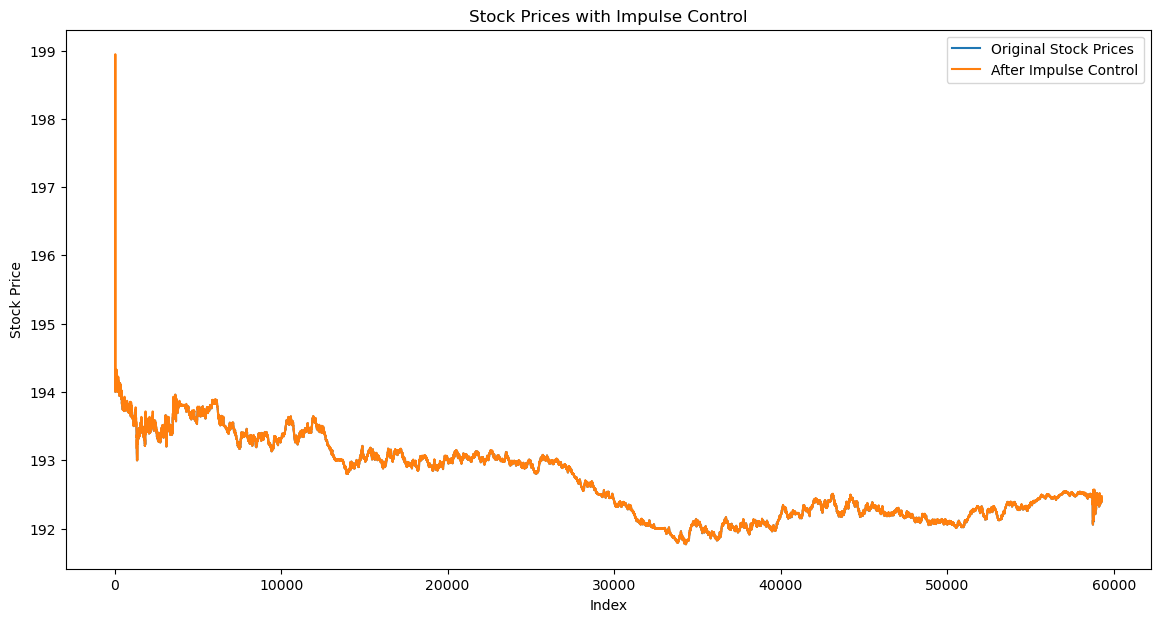

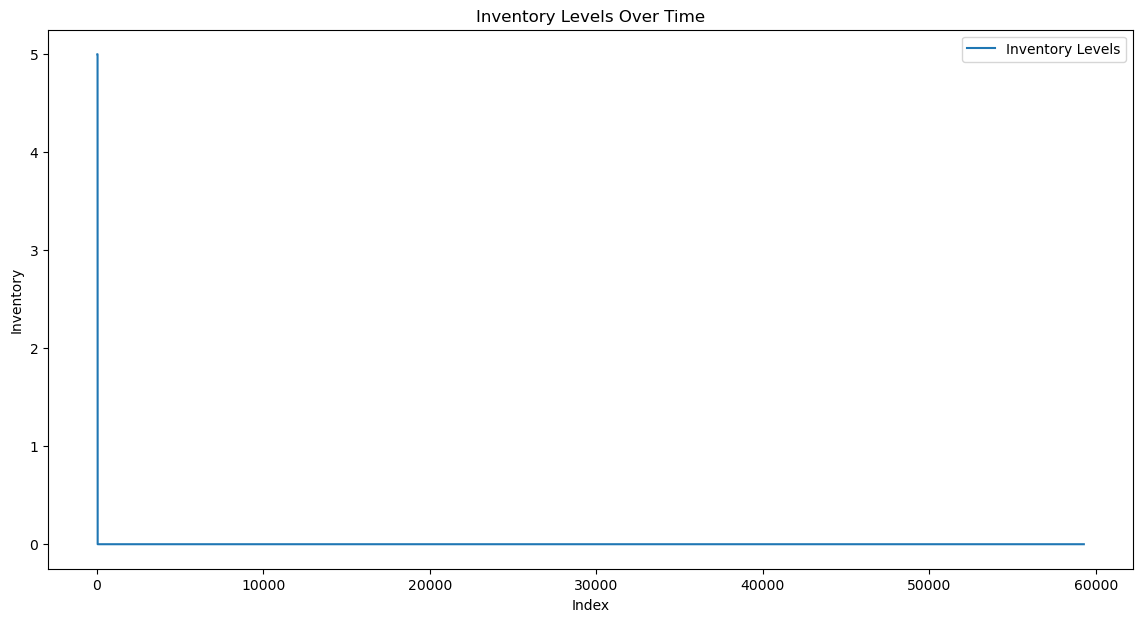

Total cash spent on slippage:  -34.57477499999985
Total slippage incurred:  24.627499999999856


In [4]:
import matplotlib.pyplot as plt

# Define the impulse control function from Boucher et al. (2011)

def impulse_control(S, initial_inventory, transaction_cost, market_impact, bid_ask_spread, volatility):
    cash = 0
    slippage_total = 0
    S_controlled = S.copy()
    inventory_controlled = np.zeros_like(S, dtype=int)
    inventory_controlled[0] = initial_inventory

    for t in range(1, len(S)):
        if np.random.rand() < 0.1:  # trading probability
            trade_size = -inventory_controlled[t - 1]  # rebalance to zero inventory
            impact = market_impact * abs(trade_size)
            actual_price = S[t] * (1 + impact) + bid_ask_spread[t] / 2
            slippage = actual_price - S[t]
            slippage_total += slippage * abs(trade_size)
            cash -= transaction_cost * abs(trade_size) * actual_price + slippage * abs(trade_size)
            S_controlled[t] = actual_price
            inventory_controlled[t] = inventory_controlled[t - 1] + trade_size
        else:
            S_controlled[t] = S[t]
            inventory_controlled[t] = inventory_controlled[t - 1]

    return cash, S_controlled, slippage_total, inventory_controlled

# Initial inventory and parameters
initial_inventory = data['Volume']
transaction_cost = 0.01
market_impact = 0.005

# Apply the impulse control function
cash, S_controlled, slippage_total, inventory_controlled = impulse_control(
    S, initial_inventory, transaction_cost, market_impact, bid_ask_spread, volatility
)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(market_features_df.index, S, label="Original Stock Prices")
plt.plot(market_features_df.index, S_controlled, label="After Impulse Control")
plt.title('Stock Prices with Impulse Control')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(market_features_df.index, inventory_controlled, label="Inventory Levels")
plt.title('Inventory Levels Over Time')
plt.xlabel('Index')
plt.ylabel('Inventory')
plt.legend()
plt.show()

print("Total cash spent on slippage: ", cash)
print("Total slippage incurred: ", slippage_total)

**2. Slippage Calculation Method:**

**Engle, R., & Ferstenberg, R. (2007). Execution Risk**

**Abstract:** Transaction costs in trading involve both risk and return. Risk is a result of price movements and price impacts over a gradual trading period. Return is associated with the cost of immediate execution. The trade-off between risk and return in optimal execution reflects the same risk preferences as in ordinary investment. Models of the joint optimization of positions and trades show conditions under which optimal execution does not depend on the other holdings in the portfolio. Optimal execution, however, may call for trades in assets other than those listed in the trading order; these can hedge the trading risks. The execution risk model for trading with reversals and continuations implies a natural measure of liquidity risk.

The paper focuses on the concept of execution risk in trading, which includes the uncertainty in achieving desired trade prices due to market conditions. The authors decompose execution risk into two main components: slippage (the difference between expected and actual trade prices) and market impact (the effect of the trade on the market price).

Key Points:

- Slippage: Analyzed as the difference between the decision price and execution price, highlighting the importance of timing and market conditions.

- Market Impact: Explored through models that predict how large trades influence market prices, emphasizing optimal execution strategies.

- Risk Measurement: The paper introduces methods to quantify and manage execution risk, aiming to minimize costs and enhance trading efficiency.

- Applications: Provides practical implications for portfolio managers and traders in optimizing trade execution.

The study emphasizes the need for robust models to predict and manage execution risk effectively, contributing to improved trading strategies.

**Mathematical Models for Slippage:**

- Slippage Decomposition: The models break down slippage into permanent and temporary components, reflecting market impact and timing errors.

- Regressions: The use of regression models to estimate the relationship between trade size and price impact, incorporating factors such as volatility and liquidity.

- Market Impact Function: A nonlinear function that estimates how trade size affects prices, helping to predict slippage based on trade characteristics and market conditions.

**Five new features for your software:**

**1. Transaction Cost Estimation Models:**

Traditional TCA programs often focus on explicit costs like commissions and fees, but incorporating sophisticated models that estimate implicit costs such as slippage and market impact provides a better view of transaction costs. This approach allows traders to better understand and manage the true costs of their trading activities, ultimately leading to more strategic and cost-effective trading decisions.

In [5]:
def transaction_cost_calculator(price, volume, commission_rate, slippage):
    total_cost = np.zeros_like(S, dtype=int)
    commission = np.zeros_like(S)
    for t in range(1, len(S)):
        # Explicit cost: Commission
        commission[t] = commission_rate * price[t] * volume[t]

        # Adding the slippage to the total cost
        total_cost[t] = commission[t] + slippage
    return total_cost

# Example data:
price           = data['price']/1e9
volume          = data['Volume']
commission_rate = 0.0025

totalcost = transaction_cost_calculator(price, volume, commission_rate, slippage_total)
print(f"Total Transaction Cost: ${totalcost}")

Total Transaction Cost: $[ 0 24 24 ... 24 24 24]


**2. Order Flow Analysis**

Order Flow Analysis delves deeper than traditional volume and price metrics by examining the sequence and timing of trades. This feature enables traders to detect patterns in order placements and cancellations, offering insights into market sentiment and liquidity dynamics that are not captured by standard metrics. This detailed analysis can enhance execution strategies and improve market timing.

In [6]:
# Example order data
order_data = {
    'timestamp': ['2024-06-25 10:00', '2024-06-25 10:01', '2024-06-25 10:02'],
    'order_type': ['buy', 'sell', 'buy'],
    'price': [100, 101, 99],
    'volume': [500, 300, 700]
}

orders = pd.DataFrame(order_data)
orders['timestamp'] = pd.to_datetime(orders['timestamp'])

# Analyze order flow
buy_orders = orders[orders['order_type'] == 'buy']
sell_orders = orders[orders['order_type'] == 'sell']

print("Buy Orders:")
print(buy_orders)
print("\nSell Orders:")
print(sell_orders)

Buy Orders:
            timestamp order_type  price  volume
0 2024-06-25 10:00:00        buy    100     500
2 2024-06-25 10:02:00        buy     99     700

Sell Orders:
            timestamp order_type  price  volume
1 2024-06-25 10:01:00       sell    101     300


**3. Liquidity Heatmaps**

Liquidity Heatmaps provide a visual and intuitive way to understand liquidity variations throughout the trading day. Unlike static liquidity metrics, heatmaps dynamically represent periods of high and low liquidity, helping traders identify the best times to execute large trades with minimal market impact. This feature leverages advanced data visualization techniques to make complex liquidity data more accessible and actionable.

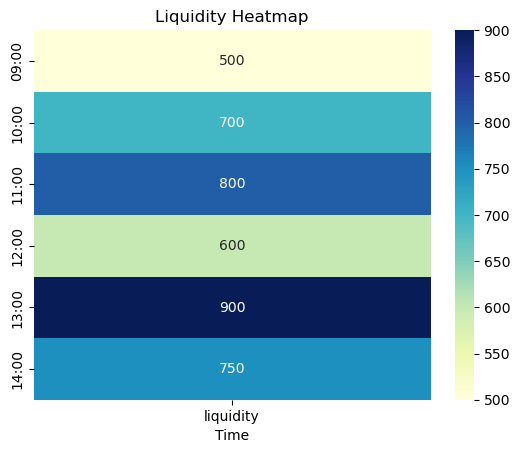

In [7]:
import seaborn as sns

# Example liquidity data
data = {
    'time': ['09:00', '10:00', '11:00', '12:00', '13:00', '14:00'],
    'liquidity': [500, 700, 800, 600, 900, 750]
}
liquidity_df = pd.DataFrame(data)

# Ensure the 'time' column is treated as categorical and ordered
liquidity_df['time'] = pd.Categorical(liquidity_df['time'], categories=liquidity_df['time'], ordered=True)

# Create a DataFrame with 'category' and 'value' columns for heatmap compatibility
liquidity_df = liquidity_df.melt(id_vars=['time'], var_name='category', value_name='value')

# Pivot the DataFrame to get the appropriate format for the heatmap
liquidity_pivot = liquidity_df.pivot(columns='category', index='time', values='value')

# Create heatmap
sns.heatmap(liquidity_pivot, cmap="YlGnBu", cbar=True, annot=True, fmt='.0f')
plt.title('Liquidity Heatmap')
plt.ticklabel_format(style='')
plt.xlabel('Time')
plt.ylabel('')
plt.show()

**4. Peer Comparison Metrics**

Peer Comparison Metrics introduce a competitive benchmarking aspect to transaction cost analysis. By comparing one's execution costs and performance against industry peers, traders can identify strengths and areas for improvement. This feature promotes continuous performance enhancement and adherence to industry best practices, driving more efficient and competitive trading operations. Data can be obtained e.g. from Bloomberg.

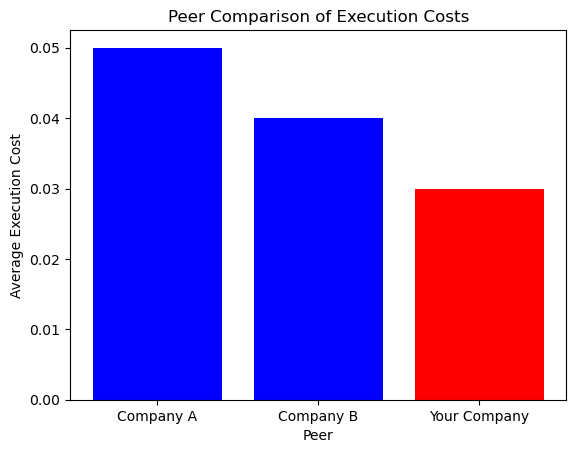

In [8]:
# Example peer data
peer_data = {
    'peer': ['Company A', 'Company B', 'Your Company'],
    'avg_execution_cost': [0.05, 0.04, 0.03]
}

peer_df = pd.DataFrame(peer_data)

# Comparison
plt.bar(peer_df['peer'], peer_df['avg_execution_cost'], color=['blue', 'blue', 'red'])
plt.xlabel('Peer')
plt.ylabel('Average Execution Cost')
plt.title('Peer Comparison of Execution Costs')
plt.show()

**5. Market Sentiment Indicators**

Market Sentiment Indicators provide a gauge of market mood by analyzing news, social media, and other sources. Understanding market sentiment helps traders make more informed decisions, complementing traditional quantitative analysis with qualitative insights that can anticipate market trends and potential price movements.

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Example news headlines
headlines = [
    "Market surges as new economic data is released",
    "Stocks plummet due to geopolitical tensions",
    "Investors optimistic about new tech IPO"
]

analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(headline)['compound'] for headline in headlines]

for i, headline in enumerate(headlines):
    print(f"Headline: {headline}\nSentiment Score: {sentiments[i]}\n")

Headline: Market surges as new economic data is released
Sentiment Score: 0.0

Headline: Stocks plummet due to geopolitical tensions
Sentiment Score: -0.4019

Headline: Investors optimistic about new tech IPO
Sentiment Score: 0.3182



In [ ]:
df_with_indicators.info()

#### Create the Trading Environment class for the PPO Agent

In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class TradingEnvironment(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, data, daily_trading_limit):
        super(TradingEnvironment, self).__init__()
        self.data = data
        self.daily_trading_limit = daily_trading_limit
        self.current_step = 0

        # Extract state columns
        self.state_columns = ['Close', 'Volume', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI']

        # Initialize balance, shares held, and total shares traded
        self.balance = 10_000_000.0  # $10 million
        self.shares_held = 0
        self.total_shares_traded = 0

        # Define action space: [Hold, Buy, Sell]
        self.action_space = spaces.Discrete(3)

        # Define observation space based on state columns
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(len(self.state_columns),), dtype=np.float32
        )

    def reset(self):
        self.current_step = 0
        self.balance = 10_000_000.0  # $10 million
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        return self._next_observation()

    def _next_observation(self):
        return self.data[self.state_columns].iloc[self.current_step].values

    def step(self, action):
        expected_price = self.data.iloc[self.current_step]['ask_px_00']
        actual_price = self.data.iloc[self.current_step]['price']
        transaction_time = self.data.iloc[self.current_step]['ts_in_delta']
        self._take_action(action)
        reward = 0
        
        if self.current_step >= len(self.data) - 1:
            self.current_step = 0
        if action != 0:
            transaction_cost= self._calculate_transaction_cost(self.data.iloc[self.current_step]['Volume'], 0.3, self.data['Volume'].mean())
            reward = self._calculate_reward(expected_price, actual_price, transaction_time, transaction_cost)
            self.cumulative_reward += reward
            if self.trades:
                self.trades[-1]['reward'] = reward
                self.trades[-1]['transaction_cost'] = transaction_cost
                self.trades[-1]['slippage'] = expected_price - actual_price
                self.trades[-1]['time_penalty'] = 100*transaction_time/1e9
        done = self.current_step == len(self.data) - 1
        obs = self._next_observation()
        info = {
        'step': self.current_step,
        'action': action,
        'price': actual_price,
        'shares': self.trades[-1]['shares'] if self.trades else 0
    }
        self.current_step += 1

        return obs, reward, done, info

    def _take_action(self, action):
        current_price = self.data.iloc[self.current_step]['Close']
        current_time = pd.to_datetime(self.data.iloc[self.current_step]['ts_event'])
        trade_info = {'step': self.current_step, 'timestamp': current_time, 'action': action, 'price': current_price, 'shares': 0, 'reward': 0, 'transaction_cost': 0, 'slippage': 0, 'time_penalty': 0}

        if action == 1: # and self.total_shares_traded < self.daily_trading_limit:  # Buy
            shares_bought = (self.balance * np.random.uniform(0.001, 0.005)) // current_price
            self.balance -= shares_bought * current_price
            self.shares_held += shares_bought
            self.total_shares_traded += shares_bought
            trade_info['shares'] = shares_bought
            if(shares_bought>0):
                self.trades.append(trade_info)
        elif action == 2: # and self.total_shares_traded < self.daily_trading_limit:  # Sell
            shares_sold = min((self.balance * np.random.uniform(0.001, 0.005)) // current_price, self.shares_held)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_traded -= shares_sold
            trade_info['shares'] = shares_sold
            if(shares_sold>0):
                self.trades.append(trade_info)

    def _calculate_reward(self, expected_price, actual_price, transaction_time, transaction_cost):
        slippage = expected_price - actual_price
        time_penalty = 100*transaction_time/1e9
        reward = - (slippage + time_penalty + transaction_cost)
        return reward
    
    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)
    
    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self, mode='human', close=False):
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Total shares traded: {self.total_shares_traded}')
        print(f'Total portfolio value: {self.balance + self.shares_held * self.data.iloc[self.current_step]["Close"]}')
        print(f'Cumulative reward: {self.cumulative_reward}')
        self.print_trades()

    def print_trades(self):
        # download all trades in a pandas dataframe using .csv
        trades_df = pd.DataFrame(self.trades)
        # Save a csv
        trades_df.to_csv('trades_ppo.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

#### Train the PPO Agent with the environment and for different tickers.

In [ ]:
# Define the daily trading limit (total number of shares to trade per day)
daily_trading_limit = 1000

ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

env = TradingEnvironment(ticker_data, daily_trading_limit)  # Adjust window_size if needed

In [ ]:
import pandas as pd
from stable_baselines3 import PPO

# Define the daily trading limit (total number of shares to trade per day)
daily_trading_limit = 1000

ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

# Create the trading environment
env = TradingEnvironment(ticker_data, daily_trading_limit)  # Adjust window_size if needed

# Define the best hyperparameters
best_hyperparameters = {'learning_rate': 0.0009931989008886031,'n_steps': 512,'batch_size': 128, 'gamma': 0.9916829193042708,'clip_range': 0.21127653449387027,'n_epochs': 6} # type: ignore

# Create the RL model with the best hyperparameters
model = PPO('MlpPolicy', env, verbose=1, **best_hyperparameters)

# Train the model
model.learn(total_timesteps=10000)

# Save the model
model.save("trading_agent")

# Evaluate the model
obs = env.reset()
for _ in range(len(ticker_data)):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        break

# Render the final state
env.render()

### TRADING BLOTTER:

#### Preprocess the data for the trading blotter:

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

INITIAL_CASH = 10_000_000  # $10 million

def preprocess_data(df):
    df['liquidity'] = df['bid_sz_00'] * df['bid_px_00'] + df['ask_sz_00'] * df['ask_px_00']
    return df

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_vol_and_liquidity(price_df, volume_df, window_size):
    # Calculate rolling statistics
    rolling_mean_vol = price_df.pct_change().rolling(window=window_size).mean()
    rolling_std_vol = price_df.pct_change().rolling(window=window_size).std()
    rolling_mean_liq = volume_df.rolling(window=window_size).mean()
    rolling_std_liq = volume_df.rolling(window=window_size).std()
    
    return rolling_mean_vol, rolling_std_vol, rolling_mean_liq, rolling_std_liq

def get_percentile(current_value, mean, std):
    if std > 0:
        z_score = (current_value - mean) / std
        percentile = norm.cdf(z_score)
    else:
        percentile = 0.5  # No variation
    return percentile

def get_trade_price(base_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction):
    vol_percentile = get_percentile(current_vol, mean_vol, std_vol)
    liq_percentile = get_percentile(current_liq, mean_liq, std_liq)

    # Define price adjustment scenarios based on market conditions
    if vol_percentile >= 0.9 and liq_percentile < 0.1:
        price_adjustment_percent = np.random.uniform(-0.25, -0.15)
    elif vol_percentile <= 0.1 and liq_percentile < 0.1:
        price_adjustment_percent = np.random.uniform(-0.10, -0.05)
    elif vol_percentile >= 0.9 and liq_percentile >= 0.9:
        price_adjustment_percent = np.random.uniform(-0.05, +0.10)
    else:
        price_adjustment_percent = np.random.uniform(-0.05, +0.05)  # Default for normal conditions

    # Adjust price based on trade direction
    if trade_direction == 'BUY':
        adjusted_price = base_price * (1 - price_adjustment_percent)
    else:  # SELL
        adjusted_price = base_price * (1 + price_adjustment_percent)
    
    return adjusted_price


#### Create trading environment for the blotter

In [ ]:
class TradingEnvironmentwithBlotter:
    def __init__(self, data, daily_trading_limit, window_size):
        self.data = preprocess_data(data)
        self.daily_trading_limit = daily_trading_limit
        self.window_size = window_size
        self.state_columns = ['price', 'liquidity', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist', 'Stoch_k', 'Stoch_d',
                              'OBV', 'Upper_BB', 'Middle_BB', 'Lower_BB', 'ATR_1', 'ADX', '+DI', '-DI', 'CCI']
        self.reset()

    def reset(self):
        self.current_step = 0
        self.balance = INITIAL_CASH
        self.shares_held = 0
        self.total_shares_traded = 0
        self.cumulative_reward = 0
        self.trades = []
        self.portfolio = {'cash': self.balance, 'holdings': {ticker: 0 for ticker in self.data['symbol'].unique()}}
        self.data['RSI'] = calculate_rsi(self.data['price'])
        self.data['pct_change'] = self.data['price'].pct_change()
        self.data['rolling_mean_vol'], self.data['rolling_std_vol'], self.data['rolling_mean_liq'], self.data['rolling_std_liq'] = calculate_vol_and_liquidity(self.data['price'], self.data['liquidity'], self.window_size)

    def step(self):
        row = self.data.iloc[self.current_step]
        current_price = row['price']
        current_time = pd.to_datetime(row['ts_event'])
        current_rsi = row['RSI']
        current_vol = row['pct_change']
        current_liq = row['liquidity']
        mean_vol = row['rolling_mean_vol']
        std_vol = row['rolling_std_vol']
        mean_liq = row['rolling_mean_liq']
        std_liq = row['rolling_std_liq']

        if current_rsi < 30:  # Entry signal based on RSI
            trade_direction = 'BUY'
            trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
            trade_size = (self.portfolio['cash'] * np.random.uniform(0.001, 0.005)) / trade_price
            if self.portfolio['cash'] >= trade_size * trade_price:
                self.portfolio['cash'] -= trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] += trade_size
                trade_status = 'filled'
            else:
                trade_status = 'cancelled'
        elif current_rsi > 70:  # Exit signal based on RSI
            trade_direction = 'SELL'
            if self.portfolio['holdings'][row['symbol']] > 0:
                trade_size = min(self.portfolio['holdings'][row['symbol']], self.portfolio['cash']*np.random.uniform(0.001, 0.005) / current_price)
                trade_price = get_trade_price(current_price, current_vol, current_liq, mean_vol, std_vol, mean_liq, std_liq, trade_direction)
                self.portfolio['cash'] += trade_size * trade_price
                self.portfolio['holdings'][row['symbol']] -= trade_size
                trade_status = 'filled'
            else:
                trade_size = 0
                trade_status = 'cancelled'
        else:
            trade_direction = 'HOLD'
            trade_size = 0
            trade_price = current_price
            trade_status = 'skipped'

        if trade_size > 0:
            expected_price = row['ask_px_00']
            actual_price = row['price']
            transaction_time = row['ts_in_delta']
            transaction_cost = self._calculate_transaction_cost(row['Volume'], 0.3, self.data['Volume'].mean())
            slippage = expected_price - actual_price
            time_penalty = 1000 * transaction_time / 1e9
            reward = - (slippage + time_penalty + transaction_cost)
        
            self.cumulative_reward += reward
            self.trades.append({
                'step': self.current_step,
                'timestamp': current_time,
                'action': trade_direction,
                'price': trade_price,
                'shares': trade_size,
                'symbol': row['symbol'],
                'reward': reward,
                'transaction_cost': transaction_cost,
                'slippage': slippage,
                'time_penalty': time_penalty
            })

            

        self.current_step += 1
        if self.current_step >= len(self.data) - 1:
            done=True
            self.current_step = 0

    def _calculate_transaction_cost(self, volume, volatility, daily_volume):
        return volatility * np.sqrt(volume / daily_volume)

    def run(self):
        self.reset()
        for _ in range(len(self.data)):
            self.step()
        return self.cumulative_reward, self.trades

    def render(self):
        print(f'Cumulative reward: {self.cumulative_reward}')
        row = self.data.iloc[self.current_step]
        print(f'Total portfolio value: {self.portfolio["cash"] + self.portfolio["holdings"][row["symbol"]]*row["Close"]}')
        # get trades in a pandas dataframe
        trades_df = pd.DataFrame(self.trades)
        # Save a csv
        trades_df.to_csv('trades_blotter.csv', index=False)
        for trade in self.trades:
            print(f"Step: {trade['step']}, Timestamp: {trade['timestamp']}, Action: {trade['action']}, Price: {trade['price']}, Shares: {trade['shares']}, Symbol: {trade['symbol']}, Reward: {trade['reward']}, Transaction Cost: {trade['transaction_cost']}, Slippage: {trade['slippage']}, Time Penalty: {trade['time_penalty']}")

#### Run the trading blotter

In [ ]:
# Filter data for the specified ticker
ticker = 'AAPL'  # Specify the ticker you want to trade
ticker_data = market_features_df[market_features_df['symbol'] == ticker]

window_size = 60
daily_trading_limit = 1000
# Create the trading environment
env = TradingEnvironmentwithBlotter(ticker_data, daily_trading_limit=1000, window_size=window_size)  # Daily trading limit of 1000 shares

# Run the environment
cumulative_reward, trades = env.run()

# Render the results
env.render()

In [ ]:
df=market_features_df.copy()

In [ ]:
df['timestamp']=pd.to_datetime(df['ts_recv'])

In [ ]:
df.head()